## Input

In [80]:
labels = {0:"Negative", 1:"Neutral", 2:"Positive"}
negative = [
    ["I hate it", 0],
    ["I don't like it so much", 0],
    ["No good at all", 0]
]
neutral = [
    ["So so", 1],
    ["No bad no good", 1],
    ["Feel nothing", 1]
]
positive = [
    ["I love it", 2],
    ["I like it so much", 2],
    ["No one can overcome", 2]
]

In [81]:
import numpy as np
data = np.array( negative + neutral + positive)
data

array([['I hate it', '0'],
       ["I don't like it so much", '0'],
       ['No good at all', '0'],
       ['So so', '1'],
       ['No bad no good', '1'],
       ['Feel nothing', '1'],
       ['I love it', '2'],
       ['I like it so much', '2'],
       ['No one can overcome', '2']], dtype='<U23')

## Tokenization

In [82]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data[:,0])
tokenizer.word_index

{'i': 1,
 'it': 2,
 'so': 3,
 'no': 4,
 'like': 5,
 'much': 6,
 'good': 7,
 'hate': 8,
 "don't": 9,
 'at': 10,
 'all': 11,
 'bad': 12,
 'feel': 13,
 'nothing': 14,
 'love': 15,
 'one': 16,
 'can': 17,
 'overcome': 18}

In [83]:
from keras.utils import to_categorical
print("Unique lables = " , set(data[:,1]))
y=to_categorical([ int(i) for i in data[:,1]])
print(y)
print(y[0], "=>", np.argmax(y[0]))
print(y[3], "=>", np.argmax(y[3]))
print(y[7], "=>", np.argmax(y[7]))

Unique lables =  {'2', '1', '0'}
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[1. 0. 0.] => 0
[0. 1. 0.] => 1
[0. 0. 1.] => 2


In [92]:
from keras.preprocessing.sequence import pad_sequences
tts = tokenizer.texts_to_sequences(data[:,0])
print("Raw Texts to Sequence:")
for s in tts: print(s)
maxlen = max([len(s) for s in tts])
print("max sentense's length = " , maxlen)
x = pad_sequences(tts, maxlen=maxlen, padding="post")
print("Squence Padding at maxlen words, post padding:\n", x)

Raw Texts to Sequence:
[1, 8, 2]
[1, 9, 5, 2, 3, 6]
[4, 7, 10, 11]
[3, 3]
[4, 12, 4, 7]
[13, 14]
[1, 15, 2]
[1, 5, 2, 3, 6]
[4, 16, 17, 18]
max sentense's length =  6
Squence Padding at maxlen words, post padding:
 [[ 1  8  2  0  0  0]
 [ 1  9  5  2  3  6]
 [ 4  7 10 11  0  0]
 [ 3  3  0  0  0  0]
 [ 4 12  4  7  0  0]
 [13 14  0  0  0  0]
 [ 1 15  2  0  0  0]
 [ 1  5  2  3  6  0]
 [ 4 16 17 18  0  0]]


In [189]:
from keras.models import Sequential
from keras.layers import Embedding

vocab_size = len(tokenizer.word_index) +1

# Fix Random Weight
# For reproducable
np.random.seed(7)

model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=2,
                    input_length=maxlen))

model.compile(loss='categorical_crossentropy', optimizer='adam')
y_predict = model.predict(x)

print("y_predict shape:\n", y_predict.shape)
print(y_predict[0])
print(min(y_predict[0][0]))
model.summary()

y_predict shape:
 (9, 6, 2)
[[-0.0177981  -0.00351046]
 [ 0.00365622 -0.00287535]
 [ 0.01436437 -0.00908862]
 [ 0.01795897  0.01882353]
 [ 0.01795897  0.01882353]
 [ 0.01795897  0.01882353]]
-0.017798103
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_80 (Embedding)     (None, 6, 2)              38        
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


In [266]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_157 (Embedding)    (None, 6, 10)             190       
_________________________________________________________________
flatten_29 (Flatten)         (None, 60)                0         
_________________________________________________________________
dense_89 (Dense)             (None, 20)                1220      
_________________________________________________________________
dense_90 (Dense)             (None, 3)                 63        
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/6
9/9 [==============================] - 6s 679ms/step - loss: 7.6817 - acc: 0.4444
Epoch 2/6
9/9 [==============================] - 0s 556us/step - loss: 7.4764 - acc: 0.4444
Epoch 3/6
9/9 [==============================] - 0s 668us/step - loss: 7.3725 - acc: 0.4

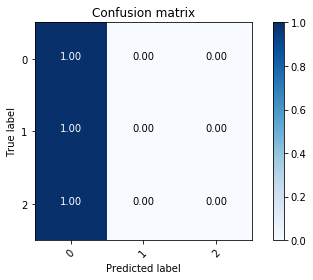

In [268]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from sklearn.metrics import confusion_matrix

vocab_size = len(tokenizer.word_index) +1

# Fix Random Weight
# For reproducable
np.random.seed(7)

model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=10,
                    input_length=maxlen))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(3, activation='relu'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

model.fit(x,y, epochs=6)

y_predict = model.predict(x)

y_t=[ np.argmax(i) for i in y]
y_p=[ np.argmax(i) for i in y_predict]
    
cm=confusion_matrix(y_t, y_p)
plot_confusion_matrix(cm=cm, classes=['0','1','2'], normalize=True)
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_158 (Embedding)    (None, 6, 10)             190       
_________________________________________________________________
lstm_48 (LSTM)               (None, 20)                2480      
_________________________________________________________________
dense_91 (Dense)             (None, 3)                 63        
Total params: 2,733
Trainable params: 2,733
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
9/9 [==============================] - 7s 801ms/step - loss: 2.6335 - acc: 0.3333
Epoch 2/10
9/9 [==============================] - 0s 1ms/step - loss: 2.6034 - acc: 0.5556
Epoch 3/10
9/9 [==============================] - 0s 2ms/step - loss: 2.5435 - acc: 0.4444
Epoch 4/10
9/9 [==============================] - 0s 2ms/step - loss: 2.5143 - acc: 0.5556
Epoch 5/10
9/9 [======================

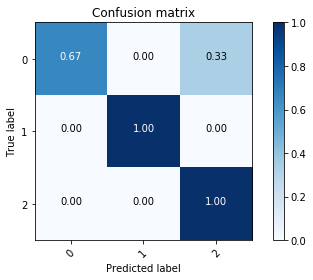

In [269]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM
from sklearn.metrics import confusion_matrix

vocab_size = len(tokenizer.word_index) +1

# Fix Random Weight
# For reproducable
np.random.seed(7)

model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=10,
                    input_length=maxlen))
#model.add(Flatten())
#model.add(Dense(20, activation='relu'))
model.add(LSTM(20))
model.add(Dense(3, activation='relu'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

model.fit(x,y, epochs=10)

y_predict = model.predict(x)

y_t=[ np.argmax(i) for i in y]
y_p=[ np.argmax(i) for i in y_predict]
    
cm=confusion_matrix(y_t, y_p)
plot_confusion_matrix(cm=cm, classes=['0','1','2'], normalize=True)
    

In [281]:
test=[
    ['I do love it',2],
    ['we do love it',2],
    ['Wow! it is great!',2],
    ['I have no idea',1],
    ['so so',1],
    ['no idea',1],
    ['totally worst',0],
    ['bad movie',0],
    ['god damn!',0],
]
data_test = np.array(test)
x_data_test = data_test[:,0]
y_data_test = data_test[:,1]

Normalized confusion matrix
[[0.66666667 0.33333333 0.        ]
 [0.         1.         0.        ]
 [0.         0.33333333 0.66666667]]


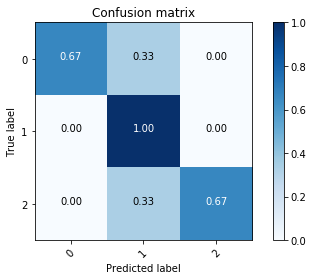

In [292]:
from keras.preprocessing.text import text_to_word_sequence
x_test=[]
for t in x_data_test:
    s = []
    for w in text_to_word_sequence(t):
        if w in tokenizer.word_index:
            s.append(tokenizer.word_index[w])
        else:
            s.append(0)
    x_test.append(s)
x_test=pad_sequences(x_test,maxlen=maxlen,padding='post')
y_test=to_categorical(y_data_test)

y_predict = model.predict(x_test)

y_t=[ np.argmax(i) for i in y_test]
y_p=[ np.argmax(i) for i in y_predict]
    
cm=confusion_matrix(y_t, y_p)
plot_confusion_matrix(cm=cm, classes=['0','1','2'], normalize=True)